##Dataset Information:

The data is about the technical specifications of cars.

1.Column Description

2.Kilometer_per_liter distance in kilometre travelled per litre

3.cylinders No of cylinders

4.displacement displacement

5.horsepower A horsepower is a unit of measurement of power, or the rate at
which work is done, usually in reference to the output of
engines or motors.

6.weight Weight of car

7.acceleration Acceleration of Car

8.model year Model Year of the car

9.origin Country origin

10.car name Car brand and model name (unique for each instance)

##1. Importing Librabries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

##2. Reading and loading the dataset

In [ ]:
df= pd.read_csv("/content/vehicle prediction.csv")
df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


In [ ]:
df.head(5)

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


##3. EDA & Data Visualization.

In [ ]:
df.shape

(398, 9)

Dataset has 9 features and 398 rows.

In [ ]:
df.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower              object
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

All the columns are numeric except name and horsepower.

In [ ]:
df.describe()

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697


The smallest cylinder is 3 and the largest is 8.

Minimum and maximum weights are 1613.00 and 5140.00 respectively.

The range of acceleration is 8.0 at the lowest to 24.80 at the maximum.

3.826 is the least kilometre per litre and 19.811 is the maximum.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
df.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

Dataset has no missing value.

In [ ]:
df.duplicated().value_counts()  # dataset has no duplicate values

False    398
dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['horsepower']= label_encoder.fit_transform(df['horsepower'])

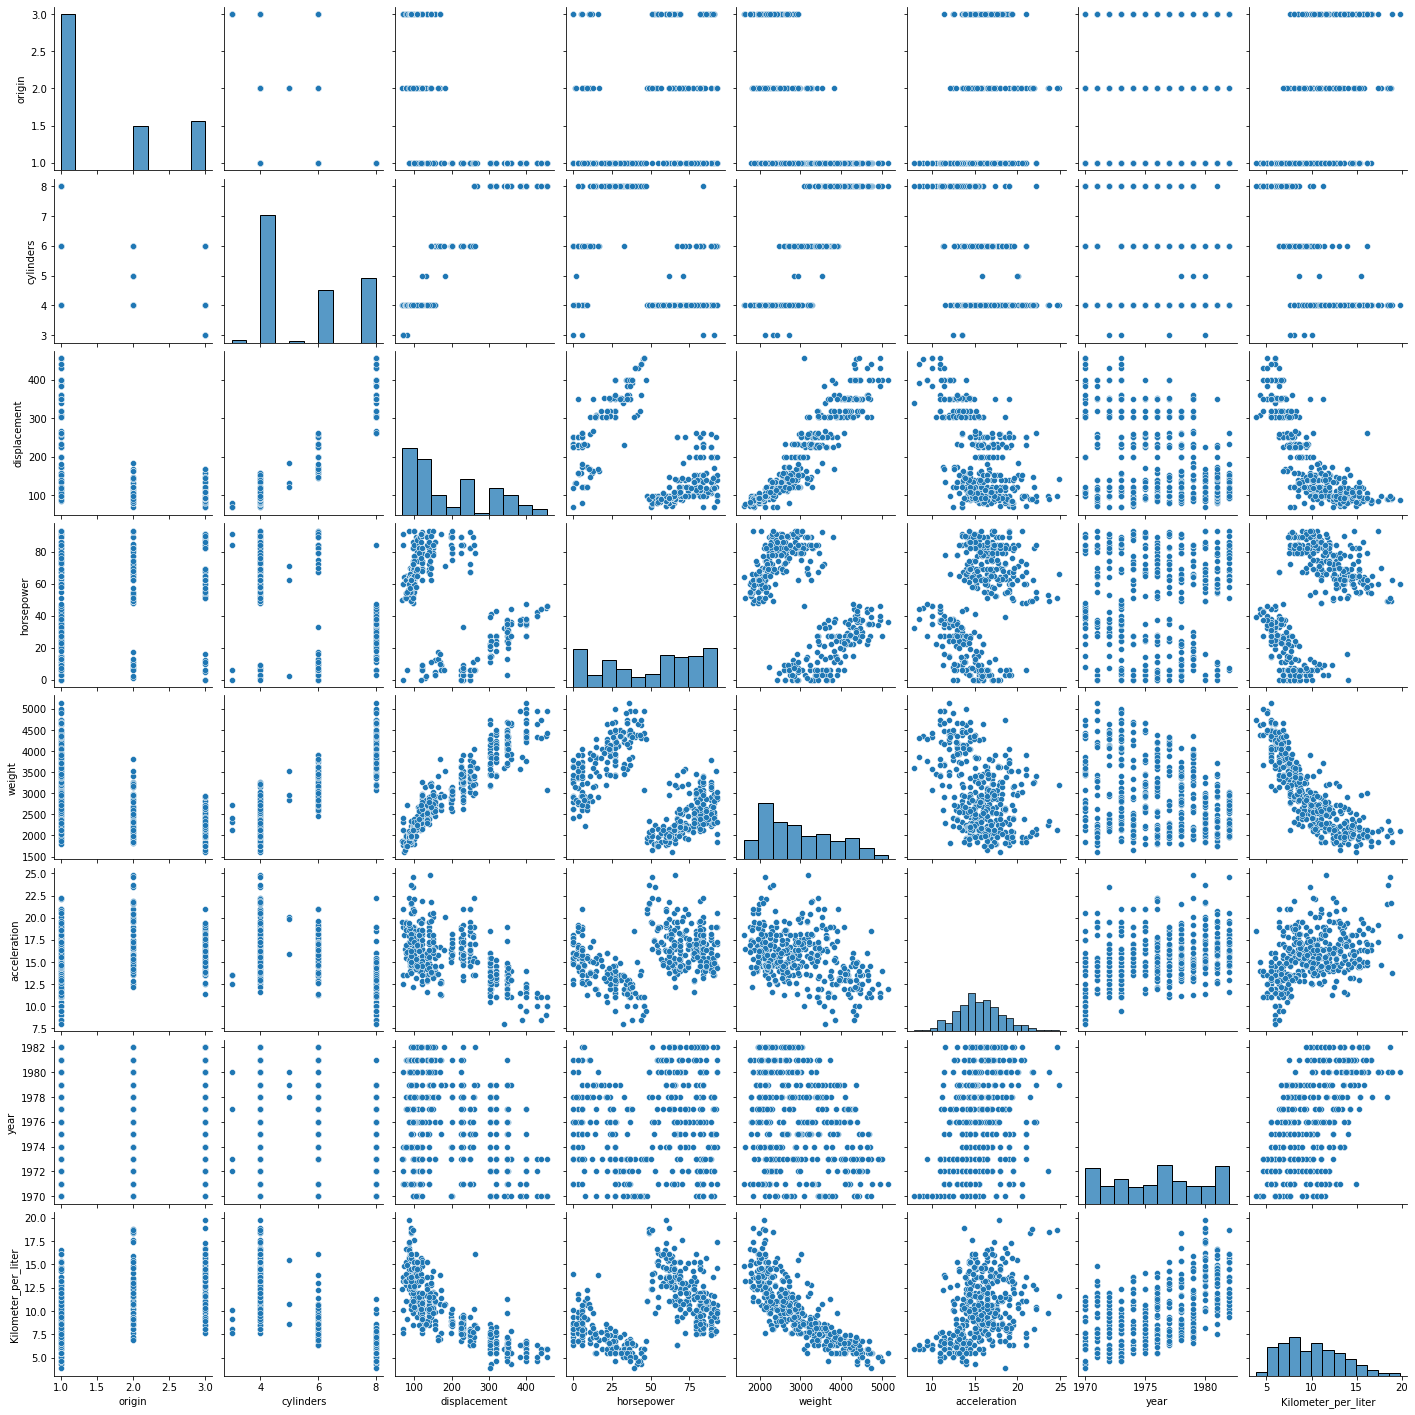

In [ ]:
sn.pairplot(data=df)

Weight and displacement have a positive correlation, meaning that if one increases, the other does too. This makes sense because engine displacement is a measurement of cylinder volume. As a result, it affects car weight.

When displacement and weights grow, kilometer-per-liter falls, which is a negative correlation.


Car kilometre per litre and acceleration are connected. The rate at which a car may pick up speed is called acceleration. So, it has an impact on automotive performance.


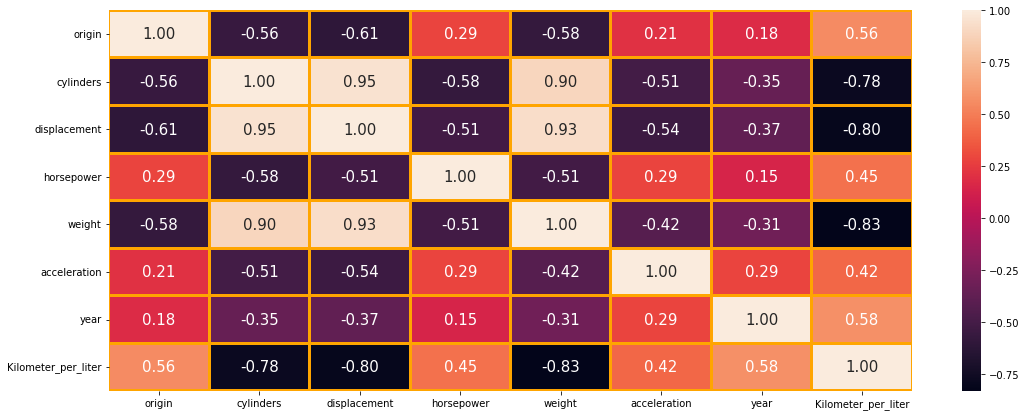

In [ ]:
plt.figure(figsize = (18, 7))
sn.heatmap(df.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'orange')
plt.show()

The second feature correlation example, heatmap, demonstrates the negative association between horsepower, displacement, and weight. While the dependent characteristic shows a positive association with origin, horsepower, acceleration, and year.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3efaba2f40>,
      dtype=object)

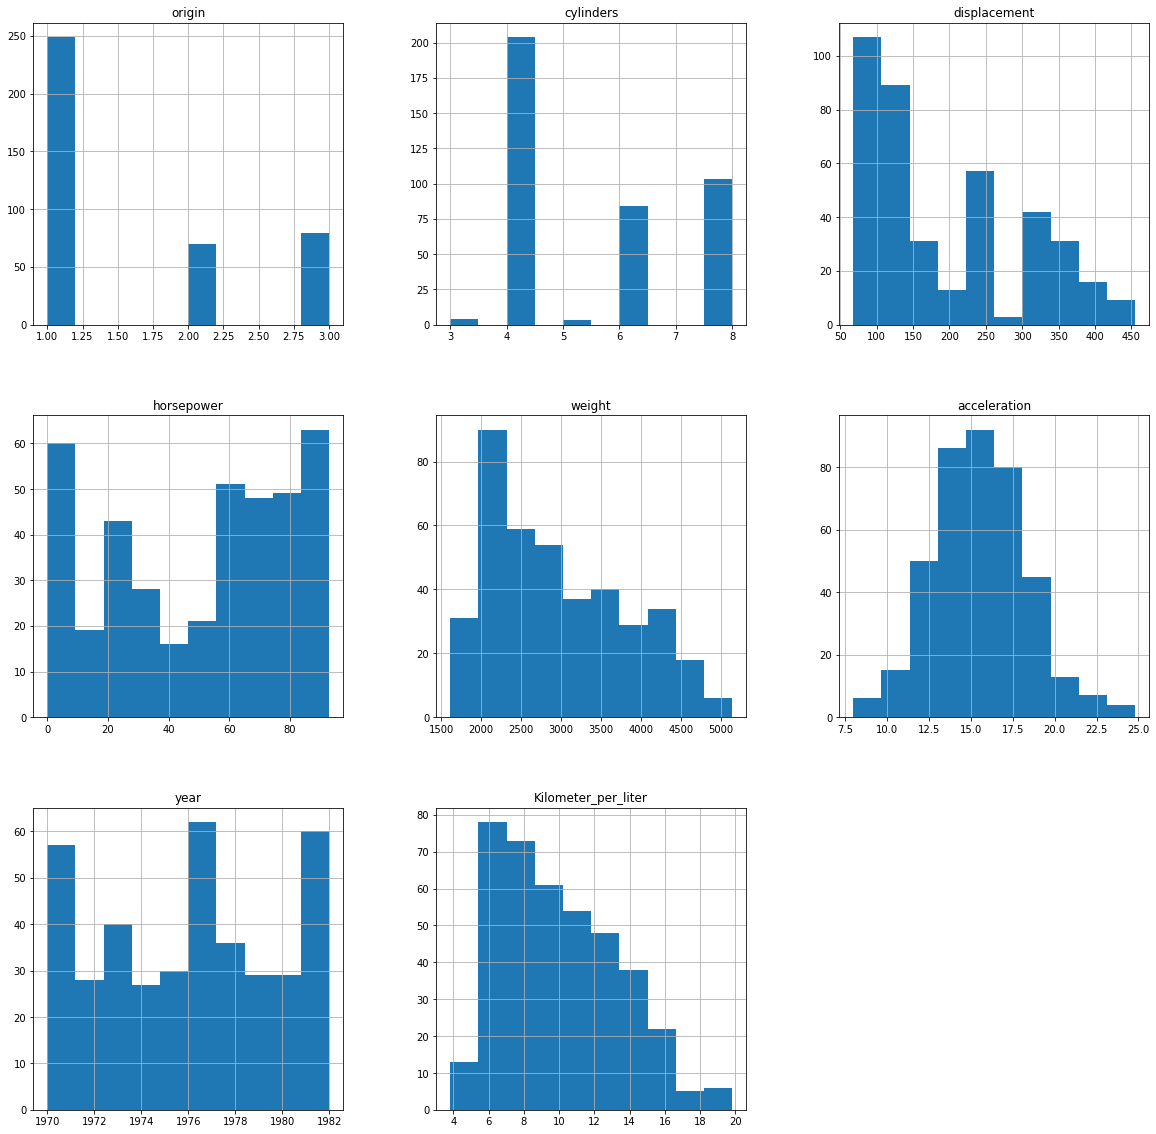

In [ ]:
df.hist(figsize=(20,20))

Feature acceleration follows a normal distribution.

Dataset is right skewed.

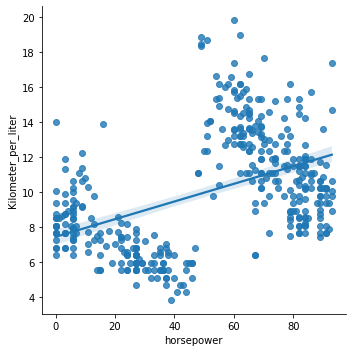

In [ ]:
sn.lmplot(x='horsepower',y='Kilometer_per_liter',data=df)

([<matplotlib.patches.Wedge at 0x7f3f00073b80>,
 [Text(-0.42295633254055504, 1.015434853037773, '1'),
  Text(-0.17293561388226758, -1.0863209808574827, '3'),
  Text(0.93631267527795, -0.5773374871891209, '2')],
 [Text(-0.23070345411303, 0.5538735562024215, '62.56%'),
  Text(-0.09432851666305503, -0.5925387168313542, '19.85%'),
  Text(0.5107160046970636, -0.3149113566486114, '17.59%')])

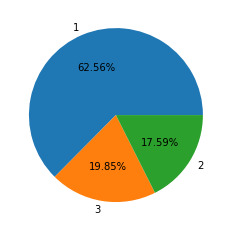

In [ ]:
y_name=df.origin.value_counts().index
y_val=df.origin.value_counts().values
plt.pie(y_val,labels=y_name,autopct='%1.2f%%')

Origin 1 has maximum car percentage count than origin 2 and 3. 

<Figure size 1440x720 with 0 Axes>

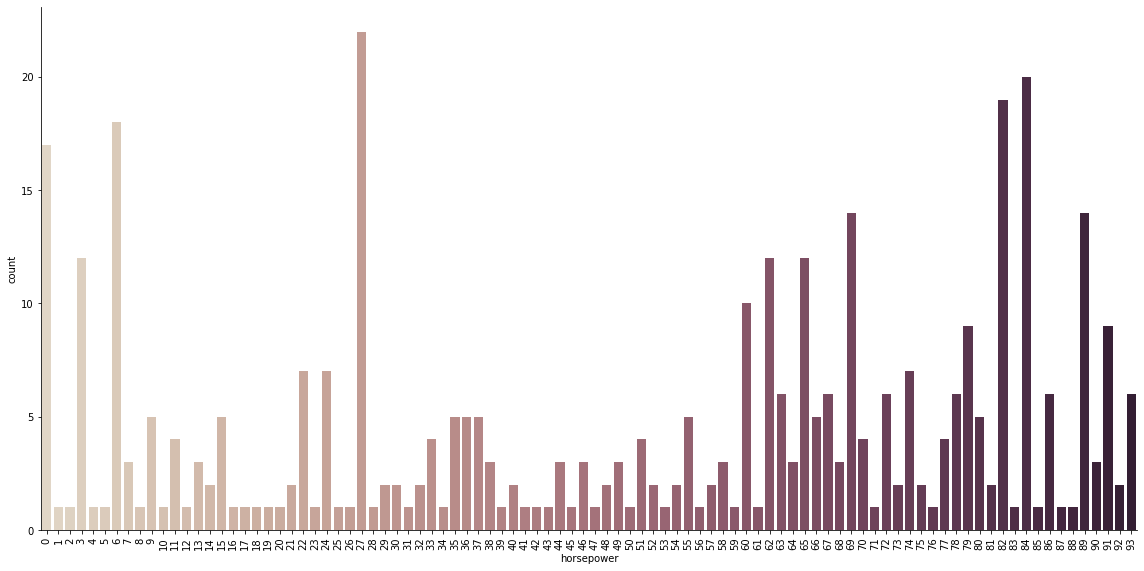

In [ ]:
var = "horsepower"
plt.figure(figsize=(20, 10))
sn.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=df);
plt.xticks(rotation=90);

The maximum horsepower is 93, while the majority of cars have 27 horsepower.

<Figure size 1440x720 with 0 Axes>

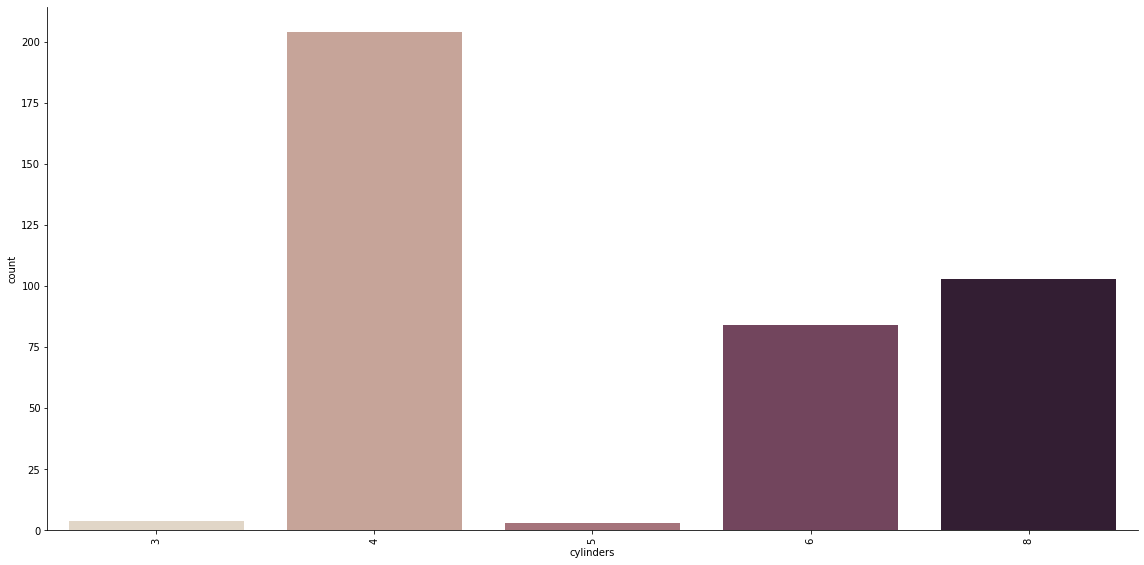

In [ ]:
var = "cylinders"
plt.figure(figsize=(20, 10))
sn.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=df);
plt.xticks(rotation=90);

Most cars have 4 cylinders, however others have 6 or 8.

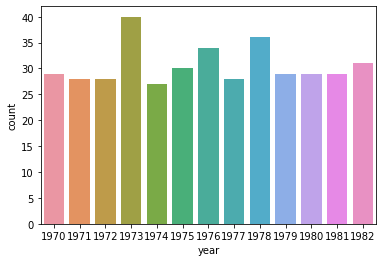

In [ ]:
sn.countplot(x='year',data=df)

There are more 1973-era cars.

##4. Data Pre-Processing / Data Cleaning

In [ ]:
df.drop('name',axis=1,inplace=True) 

In [ ]:

num_cols = df.select_dtypes(exclude = 'object')
cat_cols = df.select_dtypes(include = 'object')
     

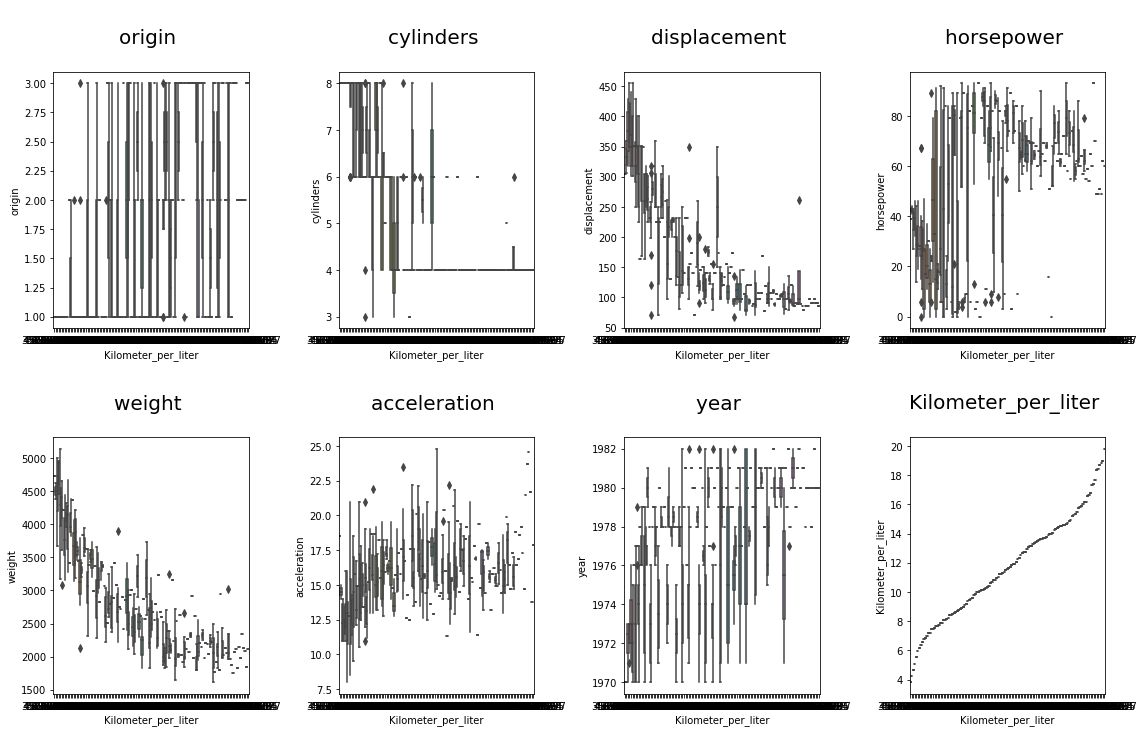

In [ ]:

cols = num_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sn.boxplot(x='Kilometer_per_liter',y = cols[i], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()
     

Dataset is high bias and have high variance. Hence, we will use scaling techinques.

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Kilometer_per_liter',axis=1)) 
scaled_features = scaler.transform(df.drop('Kilometer_per_liter',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat['Kilometer_per_liter']= df['Kilometer_per_liter']

In [ ]:
df_feat

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
0,-0.715145,1.498191,1.090604,-1.205614,0.630870,-1.295498,-1.627426,7.652587
1,-0.715145,1.498191,1.503514,-0.599550,0.854333,-1.477038,-1.627426,6.377156
2,-0.715145,1.498191,1.196232,-0.801571,0.550470,-1.658577,-1.627426,7.652587
3,-0.715145,1.498191,1.061796,-0.801571,0.546923,-1.295498,-1.627426,6.802299
4,-0.715145,1.498191,1.042591,-0.969922,0.565841,-1.840117,-1.627426,7.227443
...,...,...,...,...,...,...,...,...
393,-0.715145,-0.856321,-0.513026,0.982950,-0.213324,0.011586,1.621983,11.478880
394,0.533222,-0.856321,-0.925936,0.006514,-0.993671,3.279296,1.621983,18.706323
395,-0.715145,-0.856321,-0.561039,0.915610,-0.798585,-1.440730,1.621983,13.604599
396,-0.715145,-0.856321,-0.705077,0.747259,-0.408411,1.100822,1.621983,11.904024


In [ ]:
# Find most important features relative to target kilometer after scaling
print("Find most important features relative to kilometer-target")
corr = df.corr()
corr.sort_values(["Kilometer_per_liter"], ascending = False, inplace = True)
print(corr.Kilometer_per_liter)

Find most important features relative to kilometer-target
Kilometer_per_liter    1.000000
year                   0.579267
origin                 0.563450
horsepower             0.451767
acceleration           0.420289
cylinders             -0.775396
displacement          -0.804203
weight                -0.831741
Name: Kilometer_per_liter, dtype: float64


##5.Decide Dependant and Independant Elements in Data Set

In [ ]:

x=df.drop('Kilometer_per_liter',axis=1)
     

In [ ]:
y=df['Kilometer_per_liter']

##6.Train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)
     

##7.Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
mse=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=10)


In [ ]:
np.mean(mse)

-2.0801159716146733

##8.Predicting Test Data

In [ ]:
##prediction 
reg_pred=regression.predict(x_test)

In [ ]:
reg_pred

array([ 5.54259262, 10.21895616,  4.95497521,  9.07059273,  7.13241428,
       12.69604909, 14.05044875, 10.24275443,  5.99174353, 11.25434142,
       14.46671482, 14.34876349,  9.06938008, 11.20542534,  6.90413226,
       13.07834216, 12.3433243 , 12.44085446,  7.21166282, 13.01072091,
        6.89516682, 10.53842691, 11.67794458,  8.47688746, 12.46942406,
       11.95112241, 13.03583953, 13.11712528, 12.53020382,  7.54002175,
        8.66872854, 13.3878153 ,  8.87316123, 13.65284901,  9.9939493 ,
       11.02886763,  9.08690028,  7.27542208, 13.52531235,  3.99750266])

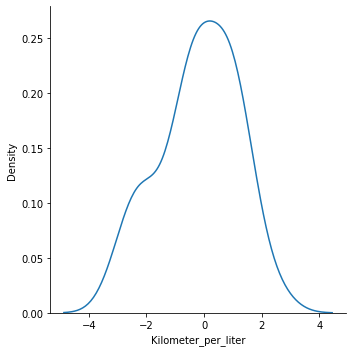

In [ ]:
sn.displot(reg_pred-y_test,kind='kde')


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score=r2_score(reg_pred,y_test)

In [ ]:

score

0.7732024289569687

##9. Ridge(L2) Regression:

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


In [ ]:
ridge_regressor=Ridge()


In [ ]:
ridge_regressor

Ridge()

In [ ]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridgecv.best_params_)

{'alpha': 5}


In [ ]:
print(ridgecv.best_score_)


-2.079166381459862


In [ ]:
ridge_pred=ridgecv.predict(x_test)


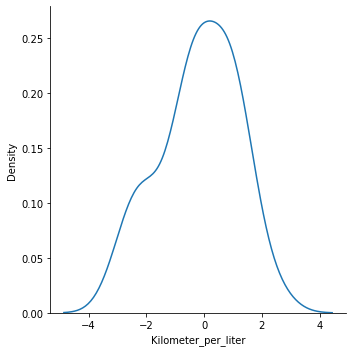

In [ ]:
sn.displot(ridge_pred-y_test,kind='kde')


In [ ]:
score=r2_score(ridge_pred,y_test)


In [ ]:
score

0.7740937106941205

##9. Lasso(L1) Regression:

In [ ]:
## Lasso Regression
from sklearn.linear_model import Lasso
 

In [ ]:
lasso=Lasso()

In [ ]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-2.2722111276125827


In [ ]:
lasso_pred=lassocv.predict(x_test)

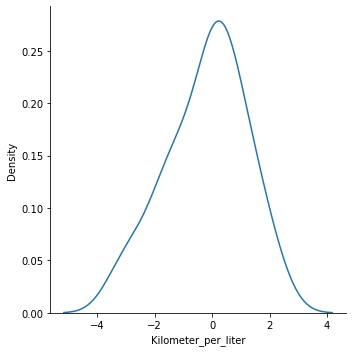

In [ ]:
sn.displot(lasso_pred-y_test,kind='kde')


In [ ]:
score=r2_score(lasso_pred,y_test)

In [ ]:
score

0.7626723076478801

##Conclusion

Out of the three models, linear regression and the ridge model are more accurate than the lasso in terms of overall score.